In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 ,os
from math import ceil
import pickle
import time
from skimage import io, feature
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from skimage import morphology
from skimage.feature import canny

def get_images_names(path):
    files_name = os.listdir( path )
    files_name.sort()
    return files_name

def read_imges(path,images_name):
    images=[]
    for image in images_name:
        img = cv2.imread(path+image,0)
        if img is not None:
            images.append(img)   
        else:
            print('Can not read image files!',path+image)
    return images

def segment_image(image):
    edges = canny(image, sigma=2)
    filled = ndi.binary_fill_holes(edges)
    filled_cleaned = morphology.remove_small_objects(filled, 21)
    return filled_cleaned

def get_foreground(segmented_image):
    foreground_pixels = []
    foreground_value = 0
    for y in range(segmented_image.shape[0]):
        for x in range(segmented_image.shape[1]):
            if segmented_image[y, x] == foreground_value:
                foreground_pixels.append((x, y)) # add it to my list of (x, y) coordinate pairs
    return foreground_pixels

def save_fg(images):
    with open('Edge_fg_pixels.pkl', 'wb') as f:
        pickle.dump(images, f)
    
def load_fg():
    with open('Edge_fg_pixels.pkl', 'rb') as f:
        loaded_fg = pickle.load(f)
    return loaded_fg

In [14]:
path='data/test2/'
#get all images name
start_time = time.time()

images_name = get_images_names(path)
images = read_imges(path,images_name)

print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 0.0040035247802734375 seconds ---


In [15]:
seg_img=[]
start_time = time.time()

for img in images:
    seg_img.append(segment_image(img))
    
print("--- execution time: %s seconds ---" % (time.time() - start_time))

--- execution time: 0.14311957359313965 seconds ---


In [16]:
fg=[]
start_time = time.time()

for img in seg_img:
    fg.append(get_foreground(img))
print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 0.8624145984649658 seconds ---


In [17]:
print(type(fg))
print(len(fg))

<class 'list'>
3


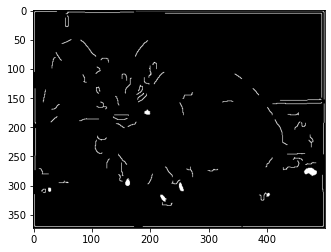

In [18]:
plt.imshow(seg_img[2],'gray')

In [19]:
start_time = time.time()
save_fg(fg)
print("--- execution time %s seconds ---" % (time.time() - start_time))

--- execution time 0.09507632255554199 seconds ---
